In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hcbagde17/cognifzy_ml_tasks/refs/heads/main/task1/cleaned_dataset.csv')
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for 2 in INR,Cuisine_count
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,7458.0,3
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,8136.0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,27120.0,4
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,10170.0,2
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,10170.0,2


In [3]:
df.loc[df['Longitude']==0].shape

(498, 20)

In [4]:
# Replace 0.0 with NaN so they don't mess up calculations
df['Longitude'] = df['Longitude'].replace(0.0, np.nan)
df['Latitude'] = df['Latitude'].replace(0.0, np.nan)

# Fill with the median of their respective City
df['Longitude'] = df['Longitude'].fillna(df.groupby('City')['Longitude'].transform('median'))
df['Latitude'] = df['Latitude'].fillna(df.groupby('City')['Latitude'].transform('median'))

In [ ]:
import plotly.express as px

# 1. Create the map
fig = px.scatter_mapbox(df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Restaurant Name", 
                        hover_data=["City", "Aggregate rating", "Average Cost for 2 in INR"],
                        color="Aggregate rating",  # Color points by rating
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        zoom=3, 
                        height=600)

# 2. Set the map style to OpenStreetMap 
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# 3. Show the map
fig.show()

C:\Users\HARSH\AppData\Local\Temp\ipykernel_452\2587595888.py:5: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(df,


In [ ]:
import folium
from folium.plugins import MarkerCluster

# 1. Create a base map centered on India (or the World)
m = folium.Map(location=[20, 78], zoom_start=5)

# 2. Add a Marker Cluster 
marker_cluster = MarkerCluster().add_to(m)

# 3. Add points to the map
for index, row in df.iterrows():
    # Check for valid coordinates
    if row['Latitude'] != 0 and row['Longitude'] != 0:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Name: {row['Restaurant Name']}\nCity: {row['City']}\nCost for 2 in INR: {row['Average Cost for 2 in INR']}", # Click to see name
            icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
        ).add_to(marker_cluster)

# 4. Save the map
m.save("restaurants_map.html")
print("Map saved as 'restaurants_map.html'. Open this file in your browser!")

Map saved as 'restaurants_map.html'. Open this file in your browser!


In [15]:
top_10_cities = df['City'].value_counts().head(10).index
count_top_10_cities = df['City'].value_counts().head(10).values
print("Top 10 cities with most restaurants:")
for city in top_10_cities:
    print("->",city, ":", count_top_10_cities[list(top_10_cities).index(city)])

Top 10 cities with most restaurants:
-> New Delhi : 5473
-> Gurgaon : 1118
-> Noida : 1080
-> Faridabad : 251
-> Ghaziabad : 25
-> Bhubaneshwar : 21
-> Ahmedabad : 21
-> Lucknow : 21
-> Guwahati : 21
-> Amritsar : 21


In [16]:
# for the top city , finding the top 10 localities with most restaurants
top_city = top_10_cities[0]
top_10_localities = df[df['City'] == top_city]['Locality'].value_counts().head(10).index
count_top_10_localities = df[df['City'] == top_city]['Locality'].value_counts().head(10).values
print(f"\nTop 10 localities in {top_city} with most restaurants:")
for locality in top_10_localities:
    print("->",locality , ":", count_top_10_localities[list(top_10_localities).index(locality)])


Top 10 localities in New Delhi with most restaurants:
-> Connaught Place : 122
-> Rajouri Garden : 99
-> Shahdara : 87
-> Defence Colony : 86
-> Pitampura : 85
-> Malviya Nagar : 84
-> Mayur Vihar Phase 1 : 84
-> Rajinder Nagar : 81
-> Safdarjung : 80
-> Satyaniketan : 79


In [18]:
city_stats = df[df['City'].isin(top_10_cities)].groupby('City').agg({
    'Aggregate rating': 'mean',        # How good are they?
    'Average Cost for 2 in INR': 'mean',    # How expensive are they?
    'Price range': 'mean',             # Price tier (1-4)
    'Votes': 'sum'                     # Total popularity
}).sort_values('Aggregate rating', ascending=False)

print(city_stats)

              Aggregate rating  Average Cost for 2 in INR  Price range   Votes
City                                                                          
Lucknow               4.195238                 859.523810     2.571429    9130
Guwahati              4.190476                 821.428571     2.523810    4964
Ahmedabad             4.161905                 857.142857     2.571429   12266
Bhubaneshwar          3.980952                 678.571429     1.857143    4243
Amritsar              3.685714                 480.952381     1.809524    3665
Ghaziabad             2.852000                 602.000000     1.800000    2366
Gurgaon               2.651431                 714.016100     1.855993  132160
New Delhi             2.438845                 596.088069     1.621597  628340
Noida                 2.036204                 539.490741     1.601852   73488
Faridabad             1.866932                 447.609562     1.454183    6486


Correlation Matrix:
                   Aggregate rating  Price range     Votes
Aggregate rating          1.000000     0.438356  0.313474
Price range               0.438356     1.000000  0.309474
Votes                     0.313474     0.309474  1.000000


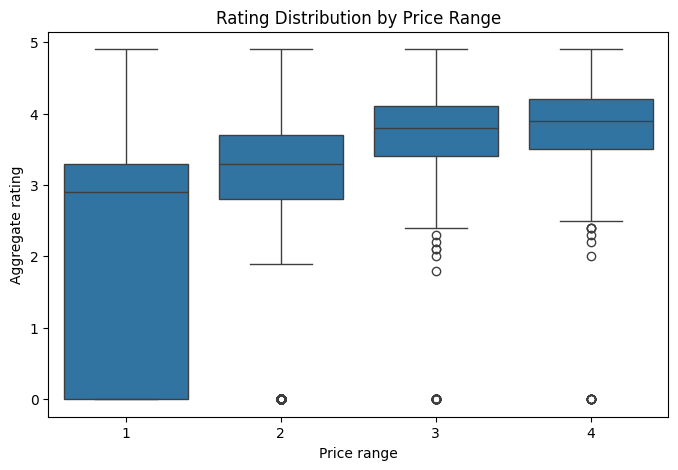

In [19]:
# Calculate correlation
corr_matrix = df[['Aggregate rating', 'Price range', 'Votes']].corr()
print("Correlation Matrix:\n", corr_matrix)

# Visualize: Do expensive restaurants get better ratings?
plt.figure(figsize=(8, 5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Rating Distribution by Price Range')

plt.show()